# Semantic Segmentation


## Class Heatmap
![Heatmap](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSRd6rCHDMj1Yf8lrDD5in14daoDyegD-EfCI6fwU7dSD9VB9OW)

## Different CV Tasks
![CVTasks](https://miro.medium.com/max/2000/1*cHtBw8yBhprNXj-CBQBx5g.png)

## Traditional way (CRF)

With the convention of __super pixel__ it is clear that we can represent a segmented image in a much lower dimensional representation.
![super_pixel](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS13gXULV9qrPK7hcC8Lz-UONCl81z28vL1Y_AvD2ImDSifcDTcIA)

If we have this super, we can plug a softmax on top of the pixles inside the super pixel to get its class label.

__But how to define a super pixel?__

With convolution filters spanning the image, they can be a form of a super pixel.

But this would be a shallow model. No spatial hierarchy.

A better idea is to use a deep conv model, and use the final feature map (say 7x7 or 4x4) that divide the input into large grids, which are very good super pixels.

Having done this downsampling, we are left with 2 more operations:

1- Upsampling again to the original image size:
done with deconv or bilinear upsampling

2- Class heatmaps:
done with 1x1 conv with output feature maps = n_classes

We will see that in detail next:

## Fully Convolutional NN

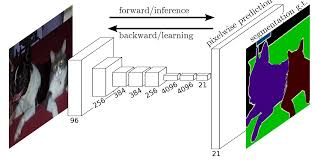

## Deconvolution, Transposed Conv and Upsampling




https://distill.pub/2016/deconv-checkerboard/

When we have neural networks generate images, we often have them build them up from low resolution, high-level descriptions. This allows the network to describe the rough image and then fill in the details.

In order to do this, we need some way to go from a lower resolution image to a higher one. We generally do this with the deconvolution operation. Roughly, deconvolution layers allow the model to use every point in the small image to “paint” a square in the larger one.

(Deconvolution has a number of interpretations and different names, including “transposed convolution.”


http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html
https://github.com/vdumoulin/conv_arithmetic

__How to get larger feature maps out of small ones?__
Let’s now consider what would be required to go the other way around, i.e., map from a 4-dimensional space to a 16-dimensional space. This operation is known as a transposed convolution.
Sometimes, it is referred to as "fractionally strided convolutions", becasue if you imagine you have stride S=1/2, then you enlarge the size by 2.

The simplest way is to apply a kernel that is larger in size than the input, and use __normal__ conv:

Convolving kernel N=3 with input M=2 gives N+M-1=4 --> 4x4 output

![Deconv](http://deeplearning.net/software/theano/_images/no_padding_no_strides.gif)

But what if we have a large input, like 100x100, and we want to have bigger output.
In this case we can pad the input:


![Deconv_pad](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_no_strides_transposed.gif)

__Fraction strides__
transpose of a convolution with s > 1 involves an equivalent convolution with s < 1. As will be explained, this is a valid intuition, which is why transposed convolutions are sometimes called fractionally strided convolutions.

![Strided_deconv](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_strides_transposed.gif)


## Dialated Conv

Those familiar with the deep learning literature may have noticed the term “dilated convolutions” (or “atrous convolutions”, from the French expression convolutions à trous) appear in recent papers. Here we attempt to provide an intuitive understanding of dilated convolutions. For a more in-depth description and to understand in what contexts they are applied, see Chen et al. (2014) [2]; Yu and Koltun (2015) [3].

Dilated convolutions “inflate” the kernel by inserting spaces between the kernel elements. The dilation “rate” is controlled by an additional hyperparameter d. Implementations may vary, but there are usually d - 1 spaces inserted between kernel elements such that d = 1 corresponds to a regular convolution.

![Dilated](http://deeplearning.net/software/theano/_images/dilation.gif)

Dialated conv is good with sparse inputs, where we don't need to multiply the kernel with evey input, but we want a bigger receptive field, keeping the same number of kernel params.

## Upsampling:
https://distill.pub/2016/deconv-checkerboard/

__What if (N-M+1)/S is a fraction?__
Unfortunately, deconvolution can easily have “uneven overlap,” putting more of the metaphorical paint in some places than others [7]. In particular, deconvolution has uneven overlap when the kernel size (the output window size) is not divisible by the stride (the spacing between points on the top). While the network could, in principle, carefully learn weights to avoid this  — as we’ll discuss in more detail later — in practice neural networks struggle to avoid it completely.

To avoid these artifacts, we’d like an alternative to regular deconvolution (“transposed convolution”). Unlike deconvolution, this approach to upsampling shouldn’t have artifacts as its default behavior. Ideally, it would go further, and be biased against such artifacts. Upsample is simply the opposite of max pool. It can spread based on NN pixels, or using bilinear transforms.

__Upsample + Conv__
Another approach is to separate out upsampling to a higher resolution from convolution to compute features. For example, you might resize the image (using nearest-neighbor interpolation or bilinear interpolation) and then do a convolutional layer. This seems like a natural approach, and roughly similar methods have worked well in image super-resolution



## Encoder Decoder Architecture
![EncDec](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/583e2dab221ad5d54c1b1cc0a9df4f1254bf3942/3-Figure1-1.png)


___Downsampling___

__Stride 2 conv:
Using stride 2 means the width and height of the feature map are downsampled by a factor of 2 (in addition to any changes induced by border effects).
So in SAME conv (the most widely used type, we halve the size by stride 2 conv__

According to the equations (valid: (N-M+1)/S, normal: (N-M+2P)/S + 1) stride 2 conv gives roughtly half the size:

![strid_2](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_strides.gif)


_Strided convolutions are rarely used in practice_, although they can come in handy for some types of models; it’s good to be familiar with the concept.

To downsample feature maps, instead of strides, we tend to use the __max-pooling__ operation, which you saw in action in the first convnet example. Let’s look at it in more depth.

According to the equations (valid: (N-M+1)/S, normal: (N-M+2P)/S + 1) stride 2 conv gives roughtly half the size:

![strid_2](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_strides.gif)

# The max-pooling operation

_Downsampleing_: In the convnet example, you may have noticed that the size of the feature maps is halved after every MaxPooling2D layer.

For instance, before the first MaxPooling2D layers, the feature map is 26 × 26, but the max-pooling operation halves it to 13 × 13.

_That’s the role of max pooling: to aggressively downsample feature maps, much like strided convolutions._

Max pooling consists of extracting windows from the input feature maps and outputting the max value of each channel.

_It’s conceptually similar to convolution, except that instead of transforming local patches via a learned linear transformation (the convolution kernel), they’re transformed via a hardcoded max tensor operation._

_A big difference from convolution is that max pooling is usually done with 2 × 2 windows and stride 2, in order to downsample the feature maps by a factor of 2. On the other hand, convolution is typically done with 3 × 3 windows and no stride (stride 1)._

__Average Pooling__

https://medium.com/@bdhuma/which-pooling-method-is-better-maxpooling-vs-minpooling-vs-average-pooling-95fb03f45a9

Note that: the blog has issue in plotting, we need to add .astype(uint8)



Max pooling selects the brighter pixels from the image. It is useful when the background of the image is dark and we are interested in only the lighter pixels of the image. For example: in MNIST dataset, the digits are represented in white color and the background is black. So, max pooling is used. Similarly, min pooling is used in the other way round.

Whereas average pooling extracts features like edges so smoothly.



# CAMVID
[CAMVID](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/) is dataset by Cambridge
_"The Cambridge-driving Labeled Video Database (CamVid) is the first collection of videos with object class semantic labels, complete with metadata. The database provides ground truth labels that associate each pixel with one of 32 semantic classes."_

It has 701 RGB images (960x720), and their corresponding ground truth masks.
It has 32 classes, where each pixel is labeled according to 1 of 32 colors. This is called per-pixel semantic segmentation (vs. instance segmentation as described above).

The colors mapping can be found in a separate [file](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/data/label_colorsSorted.txt).

The ground truth are represented as colored images, where each pixel color corresponds to a class according to the mapping in the file.

To generate the masks for training, you need to perform this mapping yourself. Once done, you can save them as npy files.


To get all the files, you can get the labels (masks images) from this [link](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/data/LabeledApproved_full.zip)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

However, to get the corresponding images, you need to run a script to extract the frames from few video sequences (like CamSeq01)

Under this nice [repo](https://github.com/GeorgeSeif/Semantic-Segmentation-Suite), the author has already done that for us, and split the data into train/val/test already. We're going to use that.

In [ ]:
view = 0
batch_sz = 4
epochs = 1
steps_per_epoch = 1000
validation_steps = 100

In [ ]:
!git clone https://github.com/GeorgeSeif/Semantic-Segmentation-Suite.git


In [ ]:
import os

In [ ]:
from pathlib import Path
data_path = Path('Semantic-Segmentation-Suite/CamVid')

In [ ]:
print('Number of train frames: ' + str(len(os.listdir(data_path/'train'))))
print('Number of train labels: ' + str(len(os.listdir(data_path/'train_labels'))))
print('Number of val frames: ' + str(len(os.listdir(data_path/'val'))))
print('Number of val labels: ' + str(len(os.listdir(data_path/'val_labels'))))
print('Number of test frames: ' + str(len(os.listdir(data_path/'test'))))
print('Number of test labels: ' + str(len(os.listdir(data_path/'test_labels'))))
print('Total frames: ' + str(len(os.listdir(data_path/'train')) + len(os.listdir(data_path/'val')) + len(os.listdir(data_path/'test'))))

Now, let's see which classes we have. This can be found in the original CAMVID [text file](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/data/label_colors.txt). However, under the same repo, the author has dumped it into csv which we will use.

In [ ]:
import pandas as pd
classes = pd.read_csv(data_path / 'class_dict.csv', index_col =0)

In [ ]:
classes

In [ ]:
n_classes = len(classes)
n_classes

This data frame maps the class names to colors.

To access the colors, we can index the dataframe with its row index name using the .loc operation.


Now we are ready to create a map from class name to color

In [ ]:
cls2rgb = {cl:list(classes.loc[cl, :]) for cl in classes.index}
cls2rgb

## Now let's visualize and explore some samples:

In [ ]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
#from google.colab.patches import  cv2_imshow

#img = cv2.imread(data_path/'train/0001TP_006690.png')
img = cv2.imread(str(data_path) + '/train/0001TP_006690.png')
plt.imshow(img)


Let's have a look on the masks (the ground truth)

As you can see the masks are just colors (L,W,3).
What we actually want is a (L,W) matrix, with each value is from 0 to 31 representing the 32 class labels.

Colors are different from the colors in cls2rgb! Because the order is BGR not RGB when using cv2.imread: https://stackoverflow.com/questions/46898979/how-to-check-the-channel-order-of-an-image

If you want to get the same order as in the color mapping of CAMVID, use the cv converted

In [ ]:
import numpy as np
mask = cv2.imread(str(data_path) + '/train_labels/0001TP_006690_L.png')
mask = cv2.cvtColor((mask).astype(np.uint8), cv2.COLOR_BGR2RGB)# If you want to get the same order as in the color mapping of CAMVID, use the cv converted

Now if you plot the mask again, you will see different colors. For example the red and blue are reversed than before:

In [ ]:
plt.imshow(mask)

Another solution is to use load_image from keras which uses RGB (it uses PIL under the hood) unlike cv2.imread

In [ ]:
from keras.preprocessing.image import load_img
mask = load_img(str(data_path) + '/train_labels/0001TP_006690_L.png')
mask

In [ ]:
mask = np.array(mask)# Now colors are the same as in the dict, since keras load_img uses RGB order.

In [ ]:
mask.shape

# Masks labels adjustment
Now to perform the mapping, we want to apply a mapping using on every pixel.
We can create a dict from color to indx (rgb2idx) and apply it on all pixels.
It can be done using the apply_along_axis operation, but takes very long.

The NN model classification output is usually produced from a softmax. The softmax produces a probability score over n_classes output. If we perform max over this output, we have a vector of size n_classesx1.

As described earlier we have LxW outputs, one per pixel, each representing a class, which we called a class heatmap. In NN world, this output is produced from LxW softmax operations over each pixel, so we have LxWxn_classes scores.

The ground truth for this output must also have LxWxn_classes, where the encoding of class label is done via One-Hot-Encoding (OHE).

In theory, the LxW mask is enough to train a NN model, since we can use sparse_categorical_cross_entropy. But we will not use this option for reasons that will be described later.



So we will try now to produce the LxWxn_classes mask:
__Numpy vector operations__
Below is a much faster implementation.

It loops over every class color, and looks for it in the mask. If found, it sets its value at the corresponding pixel, else, the pixel mask value stays all zeros. The logical operations over the whole image is much faster, while looping is kept only on the few classes.


In [ ]:
def adjust_mask(mask, flat=False):

    semantic_map = []
    for colour in list(cls2rgb.values()):
        equality = np.equal(mask, colour)# 256x256x3 with True or False
        class_map = np.all(equality, axis = -1)# 256x256 If all True, then True, else False
        semantic_map.append(class_map)# List of 256x256 arrays, map of True for a given found color at the pixel, and False otherwise.
    semantic_map = np.stack(semantic_map, axis=-1)# 256x256x32 True only at the found color, and all False otherwise.
    if flat:
      semantic_map = np.reshape(semantic_map, (-1,256*256))

    return np.float32(semantic_map)# convert to numbers

In [ ]:
new_mask = adjust_mask(mask)

In [ ]:
new_mask.shape

To make sure we performed the mapping correctly, let's try to do the reverse mapping.
Note that, we will need this later when we get predictions from our network and we want to view it as RGB mask like the original data labels.

First, we want to create the reverse mapping from class index to RGB color. Again we use dict comprehensions:

In [ ]:
idx2rgb={idx:np.array(rgb) for idx, (cl, rgb) in enumerate(cls2rgb.items())}
idx2rgb

This time we have a (L,W,32) mask and we want to map it to color mask (L,W,3). First we need to map it to index map using np.argmax, then use idx2rgb to restore the color back

In [ ]:
# Map the idx back to rgb
def map_class_to_rgb(p):
  return idx2rgb[p[0]]


print(new_mask.shape)
rgb_mask = np.apply_along_axis( map_class_to_rgb, -1, np.expand_dims(np.argmax(new_mask, axis=-1), -1))

print(np.expand_dims(np.argmax(new_mask, axis=-1), -1).shape)
print(rgb_mask.shape)

In [ ]:
plt.imshow(rgb_mask)

# Model
__U-Net__

We will investigate a famous model called U-Net

![U Net](https://lmb.informatik.uni-freiburg.de/Publications/2015/RFB15a/u-net-architecture.png)

It uses the same architecture as the encoder decoder. However it adds a well known trick called skip connections. Skip connections was first introduced in ResNet. It roots also in the recurrent neural network literature with LSTMs and GRUs.

The main issue skip connections is trying to solve is the very deep nets. Or in recurrence, the very long time dependency (back prop through time). With the increased network depth, we face the problem of vanishing gradients, due to the chain rule effect, the gradients are reduced a lot that they could vanish, and no weight updates is possible.

Skip connections enables an alternative path to the gradients:

`x2=f(x1) + x1`

This is called a residual block

![Res](https://qph.fs.quoracdn.net/main-qimg-93cef3d493d15b211aba8db3fd536b82)

In this way, if the gradient of F(x) vanished, we have an identity gradient of x that can still flow.


Also, U-Net uses upsampling as we discussed earlier.




In [ ]:
import numpy as np
import os
#import skimage.io as io
#import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(n_classes, pretrained_weights = None,input_size = (256,256,3), flat=False, ohe=True):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    x = UpSampling2D(size = (2,2))(drop5)
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x)
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    #conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    #conv10 = Conv2D(n_classes, (1,1), activation = 'softmax')(conv9)
    conv10 = Conv2D(n_classes, (1,1), padding='same')(conv9)
    if flat:
      output_layer = Reshape((256*256,n_classes))(conv10)
    else:
      output_layer = conv10
    output_layer = Activation('softmax')(output_layer)


    model = Model(inputs = inputs, outputs = output_layer)

    if ohe:
      model.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    else:
      model.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

    #model.summary()

    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model



In [ ]:
model = unet(n_classes,input_size=(128,128,3))
model.summary()

# Data in RAM
One option is to perform the above operation over all the data files masks, and load them all in RAM.



You must sort the files, otherwise you get wrong GT to mask mapping

You don't need to get the same file name, in the 2 folders, as we can sort by name. The only difference in img and mask name is _L.png

In [ ]:
def load_CAMVID(data_type='train',target_size_=(128,128), enc='ohe', shape='normal'):
  img_path = str(data_path) + '/' + data_type + '/'
  labels_path = str(data_path) + '/' + data_type + '_labels/'
  # without adding target_size=(256,256) in load_img we get Out of mem: 421x960x720x32x4bytes is around 34GB!
  x = np.array([np.array(load_img(str(img_path) + file, target_size=target_size_))*1./255 for file in sorted(os.listdir(img_path))])
  if(enc=='ohe'):

    y = np.array([adjust_mask(np.array(load_img(str(labels_path) + file, target_size=target_size_))) for file in sorted(os.listdir(labels_path))])
  elif(enc=='sparse_cat'):
    y = np.array([adjust_mask(np.array(load_img(str(labels_path) + file, target_size=target_size_))) for file in sorted(os.listdir(labels_path))])
  if(shape == 'flat'):
    y = np.reshape(y.shape[0], y.shape[1]*y.shape[2])
    y = np.expand_dims(y, axis=-1)
  return x, y


In [ ]:
import time
start = time.time()
x_train, y_train = load_CAMVID(data_type='train')  # can not load all data in ram
#x_test, y_test = load_CAMVID(data_type='test')# Don't load test for RAM consumption
x_val, y_val = load_CAMVID(data_type='val')
end = time.time()
print('Time elapsed: ', end-start)

In [ ]:
print(x_train.shape)
print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)
print(x_val.shape)
print(y_val.shape)


# Train

In [ ]:
model_checkpoint = ModelCheckpoint('unet_camvid_fromd_Ram_Data.keras', monitor='val_loss',verbose=1, save_best_only=True)
model.fit(x=x_train,
              y=y_train,
              validation_data=(x_val, y_val),
              batch_size=10,# 32 gives OOM sometimes i change it to 5 instade of 32
              epochs=epochs,
              callbacks=[model_checkpoint])

In [ ]:
import shutil

# Copy from Colab local storage to Google Drive
shutil.copy('unet_camvid_fromd_Ram_Data.keras',
            '/content/drive/MyDrive/ColabNotebooks/DI_Dr_sallab_youtube/ved_7/unet_camvid_fromd_Ram_Data.keras')


# Let's try on some samples

In [ ]:
# img (256,256,3)
# gt_mask: gt_mode=sparse--> (256,256) or ohe --> (256,256,32)
def visualize_seg(img, gt_mask, shape='normal', gt_mode='sparse'):
  plt.figure(1)

  # Img
  plt.subplot(311)
  plt.imshow(img)

  # Predict
  pred_mask = model.predict(np.expand_dims(img, 0))
  pred_mask = np.argmax(pred_mask, axis=-1)  # shape 960*701*1
  pred_mask = pred_mask[0]
  print(pred_mask)
  if shape=='flat':
    pred_mask = np.reshape(pred_mask, (256,256)) # Reshape only if you use the flat model. O.w. you dont need

  rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))

  # Prediction
  plt.subplot(312)
  plt.imshow(rgb_mask)

  # GT mask
  if gt_mode == 'ohe':
    gt_img_ohe = np.argmax(gt_mask, axis=-1)
    gt_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(gt_img_ohe, -1))

  plt.subplot(313)
  plt.imshow((gt_mask).astype(np.uint8))




In [ ]:
visualize_seg(x_val[100], y_val[100], gt_mode='ohe')

# Load data from disk

We will explore two approaches, the first is to build our own custom loader. This method is generic, and works for both image and other data sets.

Then we will see how Keras provides a convenient way to do that for Image data.

## Custom Data loaders
Keras provides a basic generator to inherity from `keras.utils.Sequence`, we just need to implement `len` and `getitem` methods.

In [ ]:
from keras.utils import Sequence
class CAMVID_Dataset(Sequence):


    def __init__(self, data_path, batch_size=4, dim=(256,256), n_classes=32, data_type='train', shape='normal'):

        self.images_dir = str(data_path) + '/' + data_type + '/'
        self.masks_dir = str(data_path) + '/' + data_type + '_labels/'
        assert len(os.listdir(self.images_dir)) == len(os.listdir(self.masks_dir))
        self.data_type = data_type
        self.shape = shape
        self.batch_size = batch_size
        self.dim = dim
        self.n = len(os.listdir(self.images_dir))
        self.n_batches = int(np.floor(self.n  / self.batch_size))
        self.indexes = np.arange(self.n)

    def __len__(self):
        return  self.n_batches

    def __getitem__(self, index):
        X = np.empty((self.batch_size, *self.dim, 3))
        Y = np.zeros((self.batch_size, *self.dim, n_classes))
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Generate data
        for i, ID in enumerate(indexes):
          idx = ID

          file = sorted(os.listdir(self.images_dir))[idx]

          # Load image
          image = np.array(load_img(str(self.images_dir) + file, target_size=(256,256)))*1./255


          # Load mask
          file = sorted(os.listdir(self.masks_dir))[idx]
          mask = adjust_mask(np.array(load_img(str(self.masks_dir) + file, target_size=(256,256))))

          if(self.shape == 'flat'):
            mask = np.reshape(mask.shape[0], mask.shape[1]*mask.shape[2])
            mask = np.expand_dims(mask, axis=-1)
          X[i,:] = image
          Y[i,:] = mask

        return X, Y


In [ ]:
train_gen = CAMVID_Dataset(str(data_path), batch_size=batch_sz, n_classes=n_classes, data_type='train')
valid_gen = CAMVID_Dataset(str(data_path), batch_size=batch_sz, n_classes=n_classes, data_type='val')

In [ ]:
x,y = next(enumerate(train_gen))[1]
print(x.shape)
print(y.shape)

In [ ]:
n_train_samples = len(os.listdir(str(data_path) + '/train/'))
n_train_samples

In [ ]:

model = unet(n_classes)

In [ ]:
model_checkpoint = ModelCheckpoint('unet_camvid_from_disk_data.keras', monitor='val_loss',verbose=1, save_best_only=True)
model.fit(train_gen,
                    validation_data=valid_gen,
                    steps_per_epoch=n_train_samples,
                    validation_steps=validation_steps,
                    epochs=epochs,
                    callbacks=[model_checkpoint])

In [ ]:
import shutil

# Copy from Colab local storage to Google Drive
shutil.copy('unet_camvid_from_disk_data.keras',
            '/content/drive/MyDrive/ColabNotebooks/DI_Dr_sallab_youtube/ved_7/unet_camvid_from_disk_data.keras')


In [ ]:
import os
print(os.getcwd())


In [ ]:
import os
print(os.listdir('.'))


Next we will see how this can be automated using ImageDataGenerator, and also to include data augmentation.

_Note_ all the next steps can also be done using custom class as above.

## Using ImageDataGenerator

We won't specify any data augmentation for now.

But if we were to, we need to take care of few things:

1- __Fix the seed__ we dont want to perform an operation on the image different from the mask. But in the same time, we have two generators, one for mask and one for images (as they are different files on disk)

2- __How to ensure the label and image files correspond to each others?__ We will have mask and image generators (loaders), each points to a different folder. Moreover, the file names of the img and mask are not the same. When we loaded the data in RAM ourselves, we used sorted to ensure consistency.

In keras, sorted is used as well. See [here](https://stackoverflow.com/questions/42868982/how-do-i-check-the-order-in-which-keras-flow-from-directory-method-processes-fo)


3- When speficifying the directory to flow_from_directory, the function assumes every sub-directory corresponds to a class (see cats vs dogs tutorial). If this is not the case, no files are loaded. However, we are not doing image classification this is not applicable.
To workaround this, we use the train, val, test folders as if they are class folders, using the parameter `classes`



In [ ]:
# Data generator
#https://keras.io/preprocessing/image/
# Data generator
#batch_sz = 4

from keras.preprocessing.image import ImageDataGenerator
# we create two instances with the same arguments

# VI Note: use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
data_gen_args = dict(rescale=1./255)

# So our usage here is as data loader instead of loading everything in RAM, not data augmentation
mask_gen_args = dict()

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow_from_directory(
    data_path,
    class_mode=None,
    classes=['train'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

mask_generator = mask_datagen.flow_from_directory(
    data_path,
    classes=['train_labels'],
    class_mode=None,
    seed=seed,
    color_mode='rgb',
    batch_size=batch_sz,
    target_size=(256,256))

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)



val_image_generator = image_datagen.flow_from_directory(
    data_path,
    class_mode=None,
    classes=['val'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

val_mask_generator = mask_datagen.flow_from_directory(
    data_path,
    classes=['val_labels'],
    class_mode=None,
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))

# combine generators into one which yields image and masks
val_generator = zip(val_image_generator, val_mask_generator)



In [ ]:

def train_generator_fn():

    for (img,mask) in train_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)

In [ ]:

def val_generator_fn():

    for (img,mask) in val_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)

_steps_per_epoch: _

Remember we dont have constant data size due to augmentation and yield in the generator. If you dont have augmentation and just using flow_from_directory as a data loader, then set this to size/batch_size_

Note that, since we don't use data augmentation, we have fixed data size. In this case steps_per_epoch is just the total_size/batch_size

In [ ]:
n_train_samples = len(os.listdir(str(data_path) + '/train/'))
n_train_samples

In [ ]:

model = unet(n_classes)

In [ ]:
model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit_generator(train_generator_fn(),
                    validation_data=val_generator_fn(),
                    steps_per_epoch=n_train_samples,
                    validation_steps=validation_steps,
                    epochs=epochs,
                    callbacks=[model_checkpoint])

## Let's test the model on sample images

In [ ]:
visualize_seg(next(val_image_generator)[0], next(val_mask_generator)[0], gt_mode='sparse')

## Data augmentation

When doing data augmentation we have to take of few things:

1- No transform to change the pixel values of the masks. Otherwise, the colors ranges will not be found in the dict.

2- Any geometric transform must be applied equally on the mask and the img

3- Fix the seed between mask and img generators, so that the same operation is applied to both.



In [ ]:
# Data generator
#batch_sz = 4
#https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator
# we create two instances with the same arguments

# VI Note: use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest',
                    rescale=1./255)

mask_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')


image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow_from_directory(
    data_path,
    class_mode=None,
    classes=['train'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

mask_generator = mask_datagen.flow_from_directory(
    data_path,
    classes=['train_labels'],
    class_mode=None,
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)


val_image_generator = image_datagen.flow_from_directory(
    data_path,
    class_mode=None,
    classes=['val'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

val_mask_generator = mask_datagen.flow_from_directory(
    data_path,
    classes=['val_labels'],
    class_mode=None,
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))

# combine generators into one which yields image and masks
val_generator = zip(val_image_generator, val_mask_generator)




In [ ]:
def val_generator_fn():

    for (img,mask) in val_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)

In [ ]:

def train_generator_fn():
    for (img,mask) in train_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)



Let's take a look on some augmented images and masks

In [ ]:
img = load_img(str(data_path) + '/train/0001TP_006690.png', target_size=(256,256))
img

In [ ]:
mask = load_img(str(data_path) + '/train_labels/0001TP_006690_L.png', target_size=(256,256))
mask

In [ ]:
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
from keras.preprocessing.image import array_to_img, img_to_array
i = 0
img = img_to_array(img)
mask = img_to_array(mask)
for aug_img, aug_mask in zip(image_datagen.flow(np.expand_dims(img, 0), batch_size=1), mask_datagen.flow(np.expand_dims(mask, 0), batch_size=1)):
    plt.figure(i)
    plt.subplot(221)
    imgplot = plt.imshow(array_to_img(aug_img[0]))
    plt.subplot(222)
    imgplot = plt.imshow(array_to_img(aug_mask[0]))
    i += 1
    if i > 10:
        break

plt.show()

In [ ]:
model = unet(n_classes)


Since we are doing data augmentation, we don't have a static data set, so we use the steps_per_epoch to control how many augmented samples per epoch we want. Let's have 1000.

In [ ]:
model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit_generator(train_generator_fn(),
                    validation_data=val_generator_fn(),
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    epochs=epochs,
                    callbacks=[model_checkpoint])

# Let's try some samples

In [ ]:
img = next(val_image_generator)[0]
gt_img = next(val_mask_generator)[0]
visualize_seg(img, gt_img, gt_mode='sparse')


# Data augmentation on data in RAM

In the above we link data augmentation to data loading.

In fact they are both independent.

Data augmentation is defined in the `ImageDataGenerator` class, or any other generator using yield

The generator can be used with files on disk (data loader), if we use flow_from_directory function.

It can also be used with data in RAM, using just the flow function

Since we are calling adjust_mask inside the generator, so we need to load the raw mask, and leave the generator to do its job.

We need to modify load_CAMVID NOT to load OHE masks, but raw colors:

In [ ]:
def load_raw_CAMVID(data_type='train', enc='ohe', shape='normal'):
  img_path = str(data_path) + '/' + data_type + '/'
  labels_path = str(data_path) + '/' + data_type + '_labels/'
  # without adding target_size=(256,256) in load_img we get Out of mem: 421x960x720x32x4bytes is around 34GB!
  x = np.array([np.array(load_img(str(img_path) + file, target_size=(256,256)))*1./255 for file in sorted(os.listdir(img_path))])
  if(enc=='ohe'):

    y = np.array([np.array(load_img(str(labels_path) + file, target_size=(256,256))) for file in sorted(os.listdir(labels_path))])
  elif(enc=='sparse_cat'):
    y = np.array([np.array(load_img(str(labels_path) + file, target_size=(256,256))) for file in sorted(os.listdir(labels_path))])
  if(shape == 'flat'):
    y = np.reshape(y.shape[0], y.shape[1]*y.shape[2])
    y = np.expand_dims(y, axis=-1)
  return x, y

In [ ]:
import time
start = time.time()
x_train, y_train = load_raw_CAMVID(data_type='train')
#x_test, y_test = load_raw_CAMVID(data_type='test')# Don't load test for RAM consumption
x_val, y_val = load_raw_CAMVID(data_type='val')
end = time.time()
print('Time elapsed: ', end-start)

print(x_train.shape)
print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

__Since we scaled while loading the data, we don't need to scale in the generator__

In [ ]:
# Data generator
#batch_sz = 4
#https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator
# we create two instances with the same arguments

# VI Note: use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
                    #rescale=1./255)# Data is already scaled when loaded

mask_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
                    #preprocessing_function=adjust_mask)# This is not possible since the preprocessing_function can only return the same shape as image

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow(
    x_train,
    seed=seed,
    batch_size=batch_sz)

mask_generator = mask_datagen.flow(
    y_train,
    seed=seed,
    batch_size=batch_sz)

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

def train_generator_fn():

    for (img,mask) in train_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)

val_image_generator = image_datagen.flow(
    x_val,
    seed=seed,
    batch_size=batch_sz)

val_mask_generator = mask_datagen.flow(
    y_val,
    seed=seed,
    batch_size=batch_sz)

# combine generators into one which yields image and masks
val_generator = zip(val_image_generator, val_mask_generator)

def val_generator_fn():

    for (img,mask) in val_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)


In [ ]:
model = unet(n_classes)

In [ ]:
model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit_generator(train_generator_fn(),
                    validation_data=val_generator_fn(),
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    epochs=epochs,
                    callbacks=[model_checkpoint])

# Try some samples

In [ ]:
img = next(val_image_generator)[0]
gt_img = next(val_mask_generator)[0]
visualize_seg(img, gt_img, gt_mode='sparse')